In [1]:
import numpy as np;import h5py;import matplotlib.pyplot as plt

In [4]:
f = h5py.File('test_small.hdf5', 'r')
sysmat = f['sysmat']
sysmat_2d=np.copy(np.reshape(sysmat,(np.prod(sysmat.shape[:-1]),sysmat.shape[-1])))
sysmat_2d_max=np.copy(np.max(sysmat_2d,axis=0))
sysmat_2d_0=np.copy(sysmat[0,0,0,0,:])
f.close()

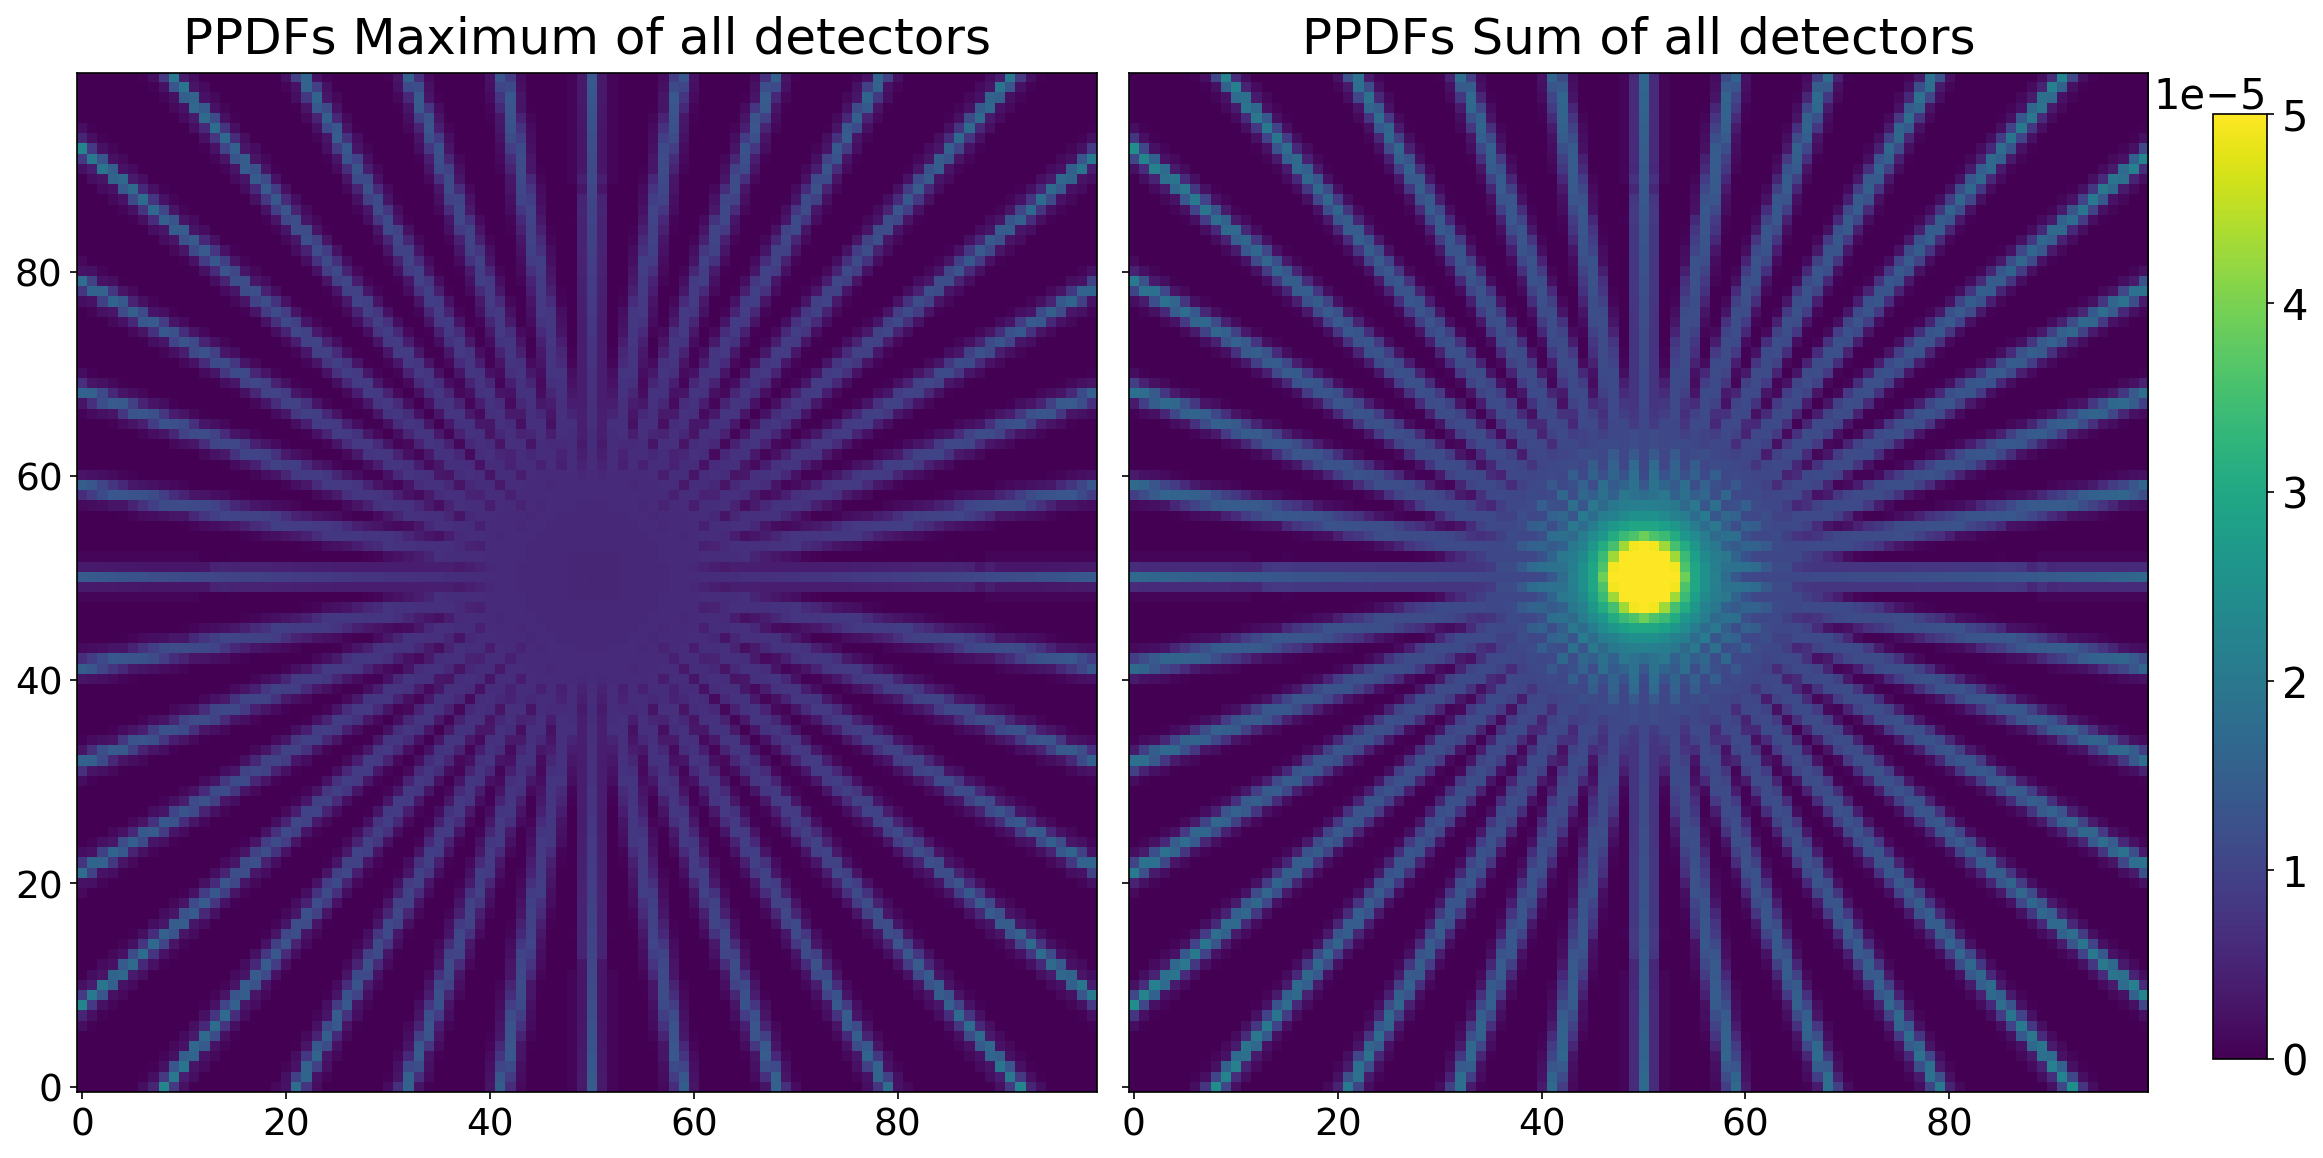

In [13]:

# fig, axs = plt.subplots(1,2,figsize=(18,9),dpi=150,height_ratios=[1])
fig, axs = plt.subplots(1,2,figsize=(18,9),dpi=150, sharey=True)
plt.rcParams.update({'font.size': 20})
im_0=axs[0].imshow(np.reshape(sysmat_2d_max,(100,100)),origin='lower',vmin=0,vmax=5e-5)
im_1=axs[1].imshow(np.reshape(np.sum(sysmat_2d,axis=0),(100,100)),origin='lower',vmin=0,vmax=5e-5)
titles=['PPDFs Maximum of all detectors','PPDFs Sum of all detectors']
for idx in range(0,2):
    axs[idx].set_title(titles[idx],pad=10)
shared_cbar = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im_0,cax=shared_cbar)
fig.subplots_adjust(wspace=0.01)
fig.savefig('test_small_mpi_ccr_cluster.png')

In [5]:
f = h5py.File('test_small_rshift.hdf5', 'r')
sysmat = f['sysmat']
sysmat_rshift = np.copy(sysmat[0,:,0,0])
f.close()

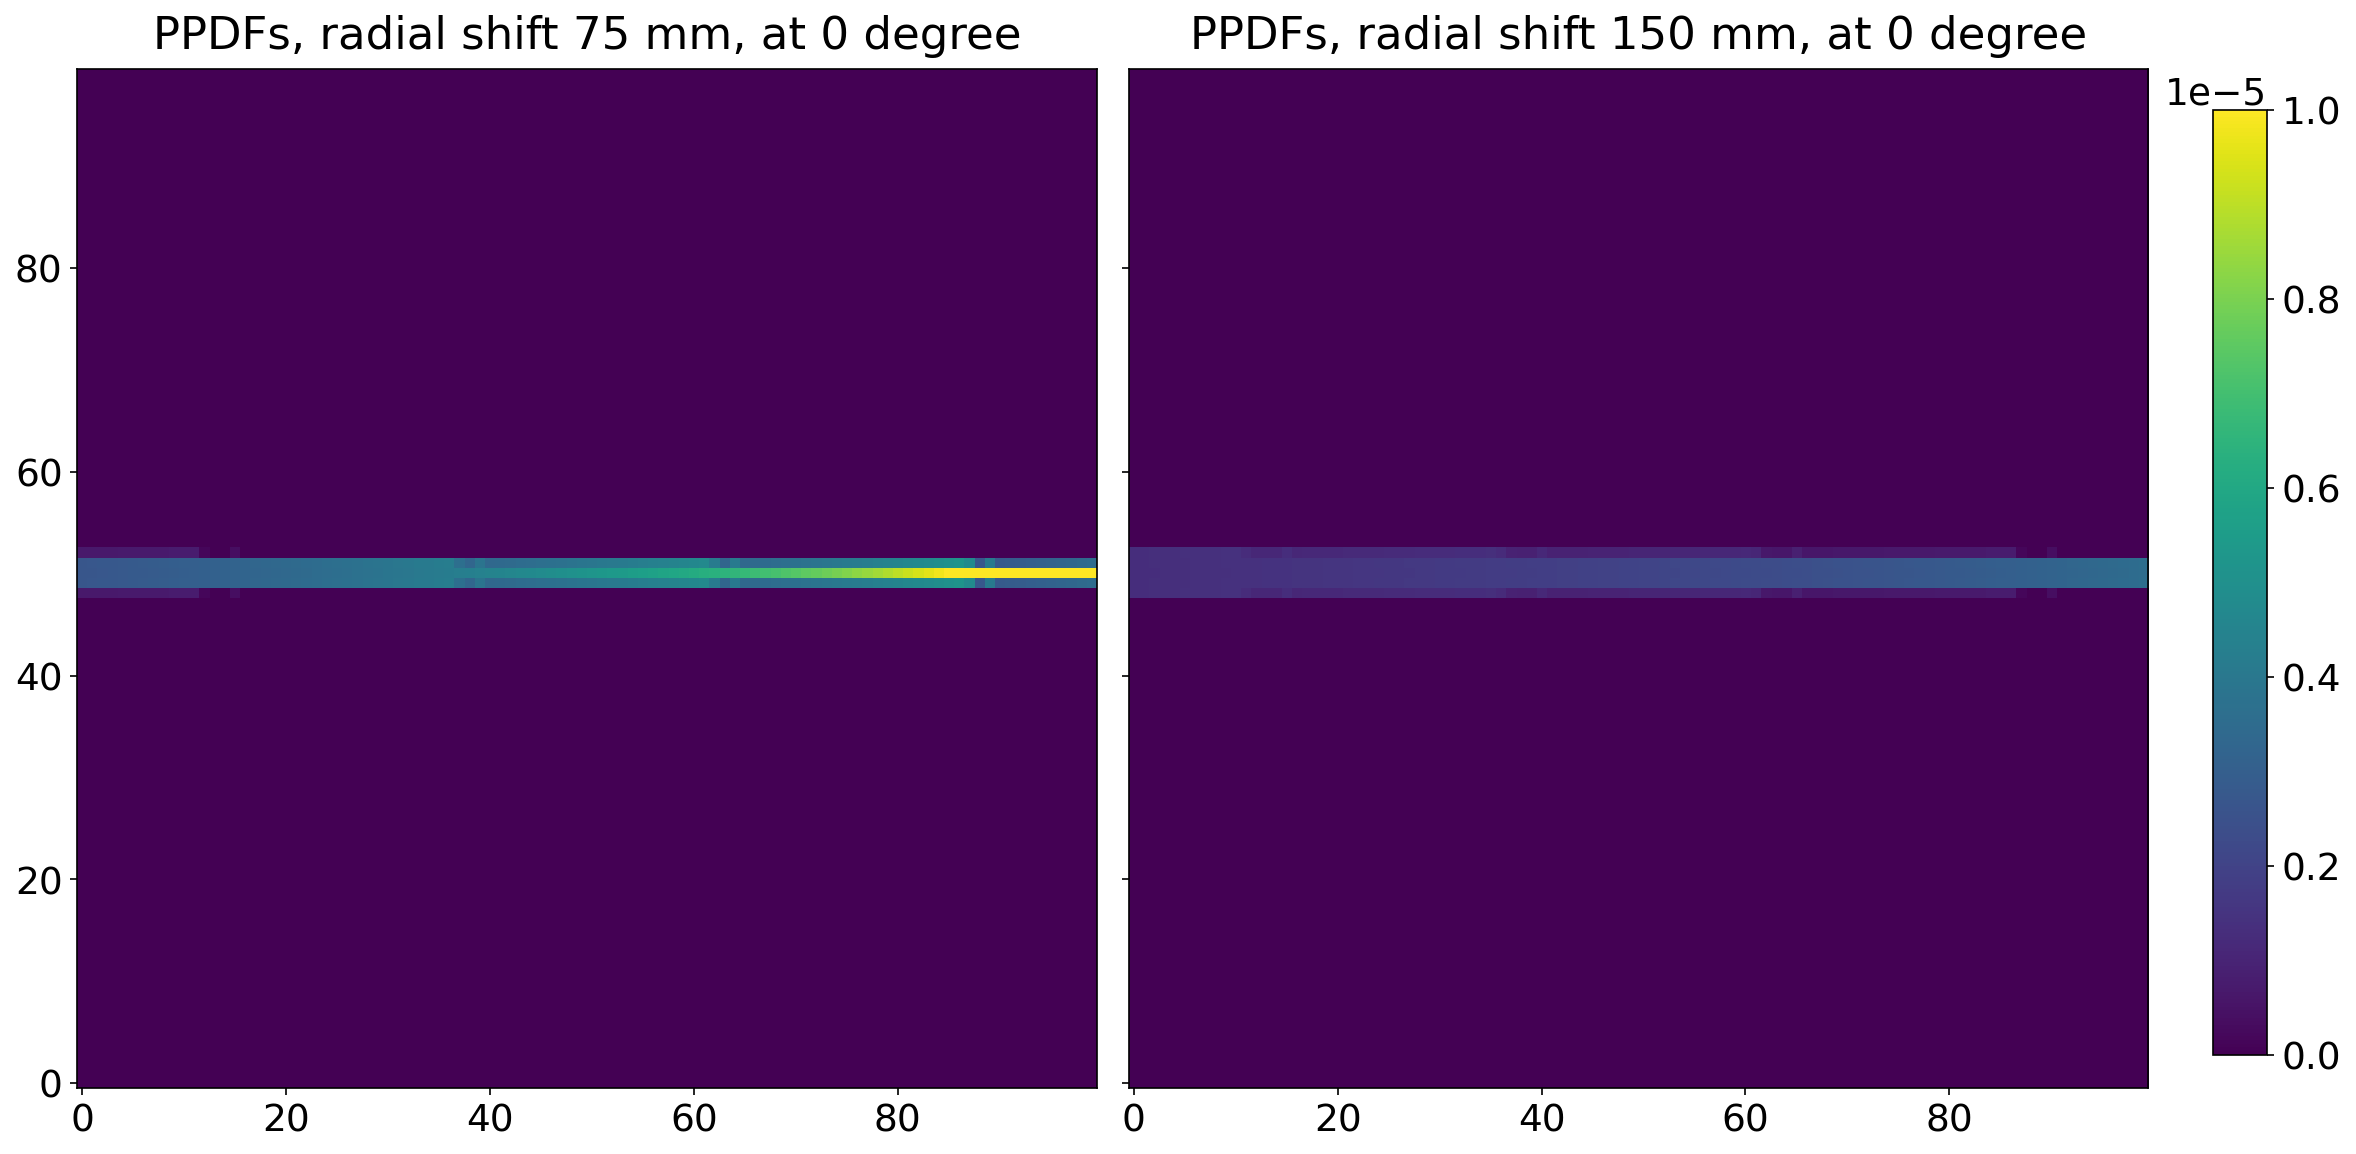

In [15]:
fig, axs = plt.subplots(1,2,figsize=(18,9),dpi=150, sharey=True)
plt.rcParams.update({'font.size': 18})
titles=['PPDFs, radial shift 75 mm, at 0 degree','PPDFs, radial shift 150 mm, at 0 degree']
ims=[]
for idx in range(0,2):
    ims.append(axs[idx].imshow(np.reshape(sysmat_rshift[idx],(100,100)),origin='lower',vmin=0,vmax=1e-5))
    axs[idx].set_title(titles[idx],pad=10)
shared_cbar = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ims[0],cax=shared_cbar)
fig.subplots_adjust(wspace=0.01)
fig.savefig('test_small_rshift_mpi_ccr_cluster.png')

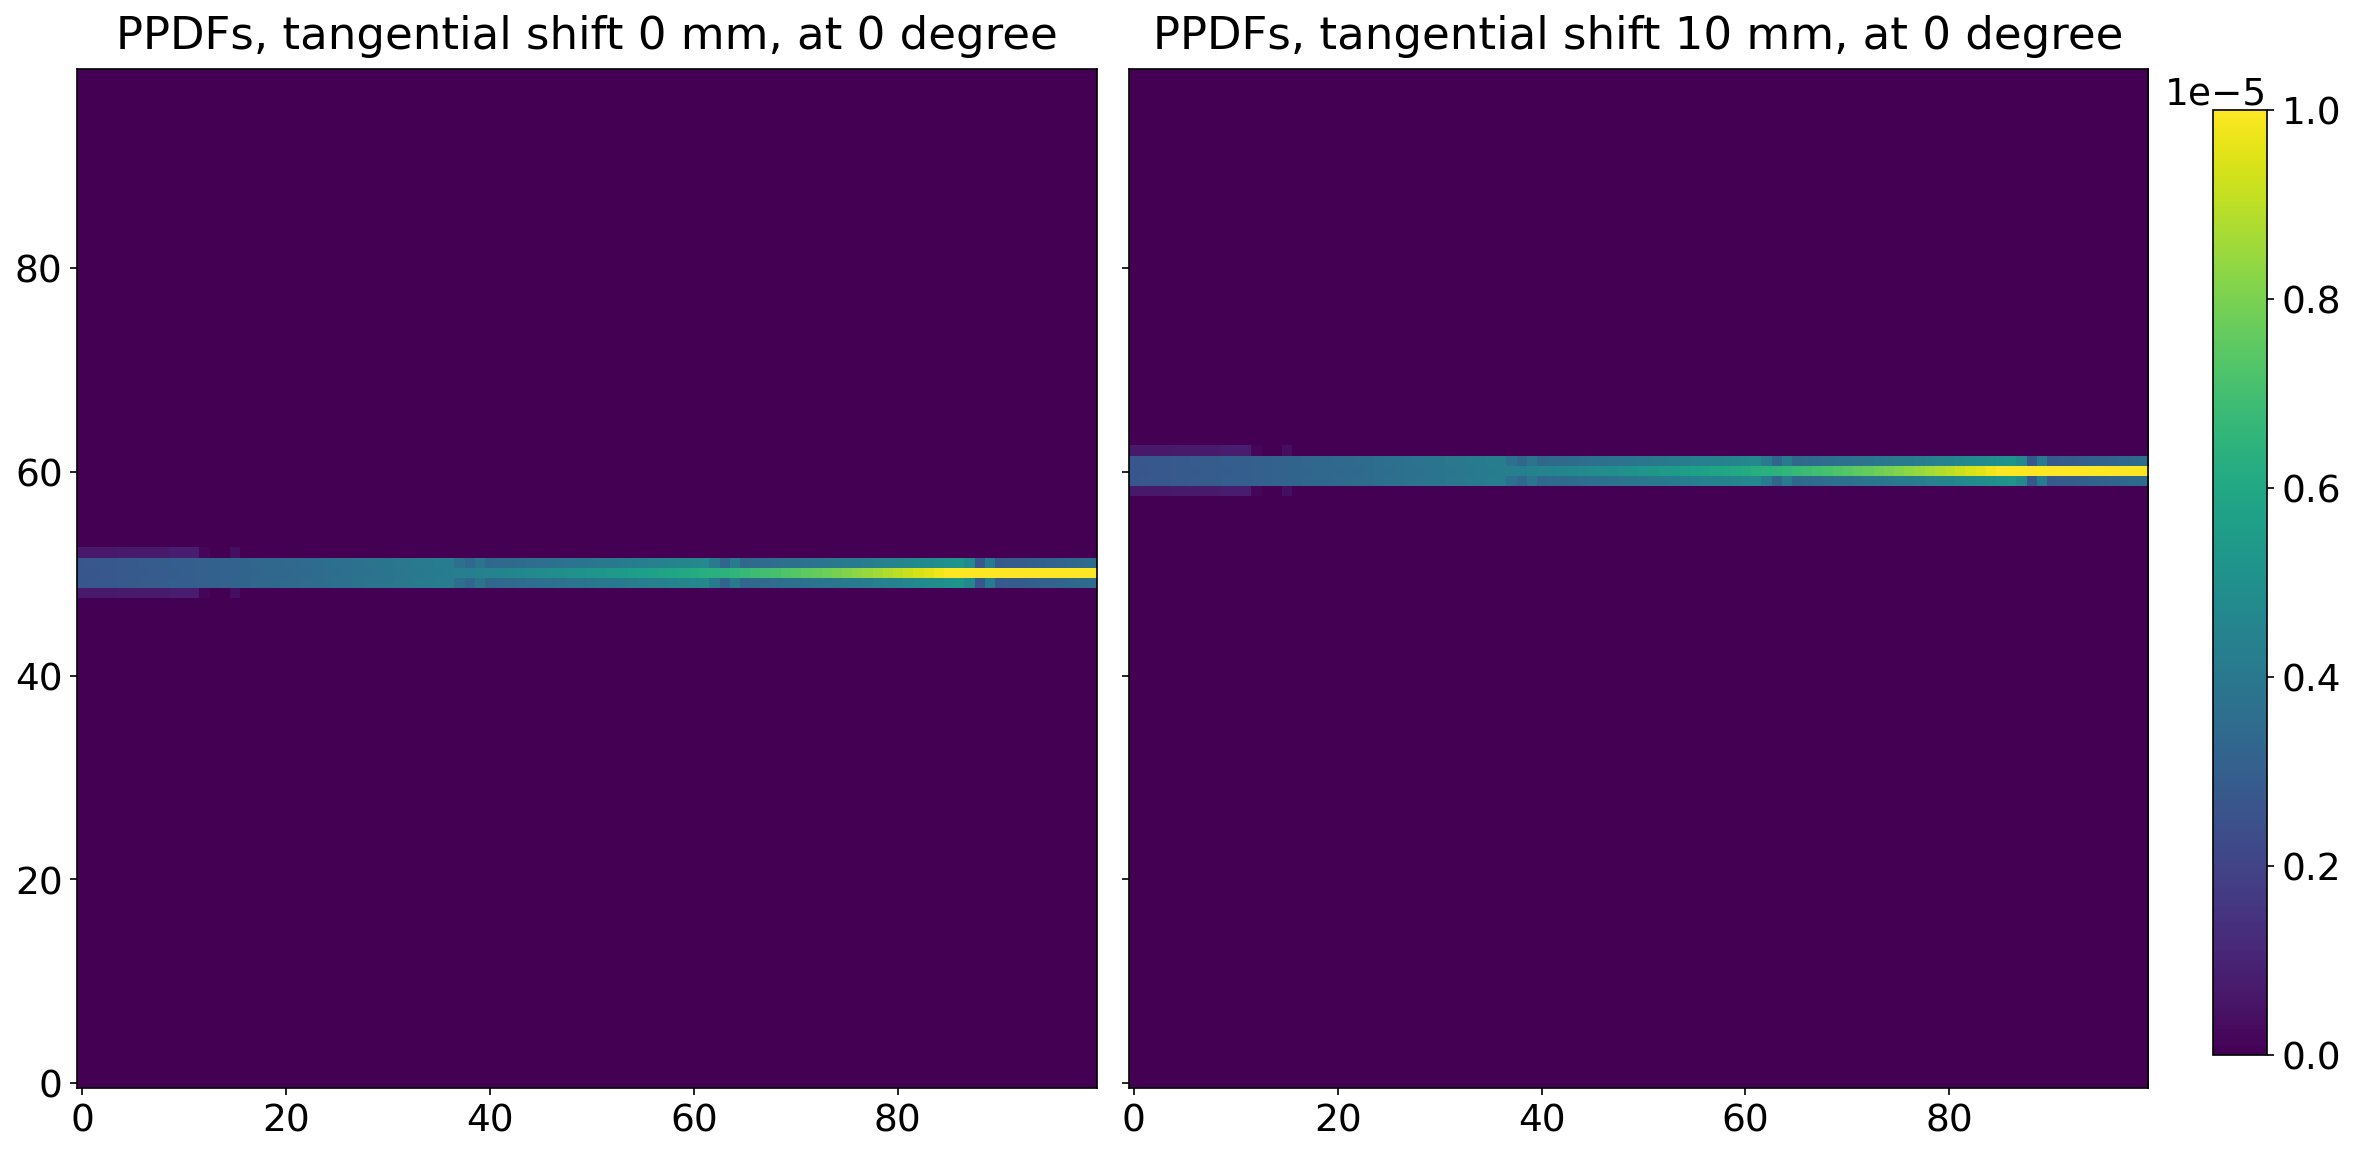

In [17]:
f = h5py.File('test_small_tshift.hdf5', 'r')
sysmat = f['sysmat']
sysmat_tshift = np.copy(sysmat[:,0,0,0])
f.close()
fig, axs = plt.subplots(1,2,figsize=(18,9),dpi=150, sharey=True)
# plt.rcParams.update({'font.size': 18})
titles=['PPDFs, tangential shift 0 mm, at 0 degree','PPDFs, tangential shift 10 mm, at 0 degree']
ims=[]
for idx in range(0,2):
    ims.append(axs[idx].imshow(np.reshape(sysmat_tshift[idx],(100,100)),origin='lower',vmin=0,vmax=1e-5))
    axs[idx].set_title(titles[idx],pad=10)
shared_cbar = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ims[0],cax=shared_cbar)
fig.subplots_adjust(wspace=0.01)
fig.savefig('test_small_tshift_mpi_ccr_cluster.png')